In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
data_folder = "C:\\Users\\shyen\\fasanara-digital\\data\\"

In [4]:
df1 = pd.read_csv(data_folder + "binance_book_snapshot_25_2022-09-28_BTCUSDT.csv")
df2 = pd.read_csv(data_folder + "binance_trades_2022-09-28_BTCUSDT.csv")

In [5]:
df1 = df1.drop(['exchange', 'symbol', 'local_timestamp'], axis=1)
df2 = df2.filter(items=('timestamp', 'side', 'price', 'amount'))

In [6]:
# Contruct target values: transaction return
# transaction return = average(all transactions in interval)/mid price - 1
df1_1 = df1[['timestamp', 'asks[0].price', 'asks[0].amount', 'bids[0].price', 'bids[0].amount']]
df1_1['timestamp_millisec'] = df1_1['timestamp'].apply(lambda x: int(str(x)[:11]+'00'))
df1_1 = df1_1.iloc[1:]

C:\Users\shyen\AppData\Local\Temp\ipykernel_20264\2313606967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1['timestamp_millisec'] = df1_1['timestamp'].apply(lambda x: int(str(x)[:11]+'00'))


In [7]:
# complete timestamp by milliseconds
s = []
for i in range(1664323202800, 1664409599800+100,100):
    s.append(i)
s = pd.DataFrame(s)
df1_2 = s.rename(columns={0:'timestamp_millisec'})
df1_2['datetime'] = pd.to_datetime(df1_2['timestamp_millisec'], unit = 'ms')

In [8]:
df1_2 = df1_2.merge(df1_1, how='left', on='timestamp_millisec')
df1_2.fillna(method='ffill', inplace=True)
df1_2.drop('timestamp', axis=1, inplace=True)

In [9]:
# save a copy
df1_2 = df1_2.rename(columns={'timestamp_millisec':'ms', 'asks[0].price':'best_ask_price', 'asks[0].amount':'best_ask_size', 'bids[0].price':'best_bid_price', 'bids[0].amount':'best_bid_size'})
df1_2['midprice'] = (df1_2['best_ask_price']+df1_2['best_bid_price'])/2
A = df1_2.copy()

## transform df2

In [10]:
df2_1 = df2.copy()
df2_1['direction'] = df2_1['side'].apply(lambda x: 1 if x == 'buy' else -1)
df2_1 = df2_1.drop('side', axis=1)

In [11]:
df2_1['ms'] = df2_1.timestamp.apply(lambda x: int(str(x)[:11]+'00'))

In [12]:
df2_1['timestamp_sec'] = df2_1.timestamp.apply(lambda x: int(str(x)[:10]))
df2_1['datetime'] = pd.to_datetime(df2_1['timestamp_sec'], unit = 's')

In [13]:
df2_1

,timestamp,price,amount,direction,ms,timestamp_sec,datetime
0,1664323199997000,19078.10,0.00082,-1,1664323199900,1664323199,2022-09-27 23:59:59
1,1664323199998000,19079.13,0.00309,1,1664323199900,1664323199,2022-09-27 23:59:59
2,1664323200000000,19078.10,0.00238,-1,1664323200000,1664323200,2022-09-28 00:00:00
3,1664323200002000,19078.10,0.00084,-1,1664323200000,1664323200,2022-09-28 00:00:00
4,1664323200003000,19078.10,0.00279,-1,1664323200000,1664323200,2022-09-28 00:00:00
...,...,...,...,...,...,...,...
7357207,1664409599992000,19413.32,0.00079,1,1664409599900,1664409599,2022-09-28 23:59:59
7357208,1664409599992000,19413.32,0.00079,1,1664409599900,1664409599,2022-09-28 23:59:59
7357209,1664409599992000,19413.33,0.00056,1,1664409599900,1664409599,2022-09-28 23:59:59
7357210,1664409599993000,19413.33,0.00798,1,1664409599900,1664409599,2022-09-28 23:59:59


In [14]:
a = df2_1.groupby('datetime')[['price']].sum().reset_index().iloc[1:]

In [15]:
# complete timestamp by seconds
# two seconds less than df2
s = []
for i in range(1664323200, 1664409599+1):
    s.append(i)
s = pd.DataFrame(s)
a1 = s.rename(columns={0:'timestamp_sec'})
a1['datetime'] = pd.to_datetime(a1['timestamp_sec'], unit = 's')

In [16]:
a1 = a1.merge(a, how='left', on='datetime')

In [17]:
a1=a1.fillna(0)

In [18]:
b = df2_1.groupby('datetime')[['amount']].count().reset_index().iloc[1:]

In [19]:
# complete timestamp by seconds
# two seconds less than df2
s = []
for i in range(1664323200, 1664409599+1):
    s.append(i)
s = pd.DataFrame(s)
b1 = s.rename(columns={0:'timestamp_sec'})
b1['datetime'] = pd.to_datetime(b1['timestamp_sec'], unit = 's')

In [20]:
b1 = b1.merge(b, how='left', on='datetime')

In [21]:
s = []
for i in range(int(86400/5)):
    s += [i]*5

In [22]:
a1['count'] = np.array(s)
a2 = a1.groupby('count')[['price']].sum().reset_index()

In [23]:
s = []
for i in range(int(86400/5)):
    s += [i]*5
b1['count'] = np.array(s)
b2 = b1.groupby('count')[['amount']].sum().reset_index()

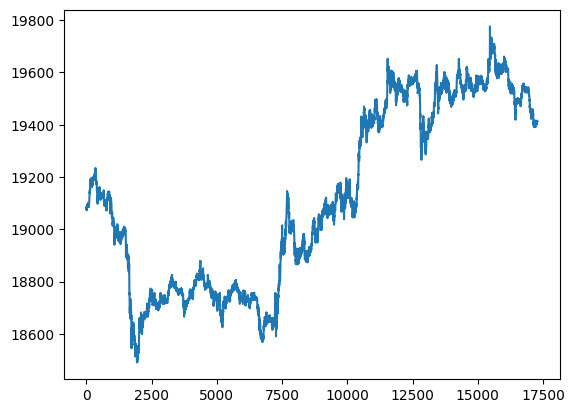

In [24]:
plt.plot(a2['price']/b2['amount'])

In [25]:
# complete timestamp by milliseconds
s = []
for i in range(1664323202800, 1664409599800+100,100):
    s.append(i)
s = pd.DataFrame(s)
df2_2 = s.rename(columns={0:'ms'})
df2_2['datetime'] = pd.to_datetime(df2_2['ms'], unit = 'ms')

In [26]:
# complete timestamp by seconds
# two seconds less than df2
s = []
for i in range(1664323200, 1664409599+1, 5):
    s.append(i)
s = pd.DataFrame(s)
df2_3 = s.rename(columns={0:'timestamp_sec'})
df2_3['datetime'] = pd.to_datetime(df2_3['timestamp_sec'], unit = 's')

In [27]:
df2_3['avgPx'] = a2['price']/b2['amount']

In [28]:
df2_3

,timestamp_sec,datetime,avgPx
0,1664323200,2022-09-28 00:00:00,19084.114882
1,1664323205,2022-09-28 00:00:05,19086.692271
2,1664323210,2022-09-28 00:00:10,19086.020717
3,1664323215,2022-09-28 00:00:15,19082.571387
4,1664323220,2022-09-28 00:00:20,19082.299873
...,...,...,...
17275,1664409575,2022-09-28 23:59:35,19412.918621
17276,1664409580,2022-09-28 23:59:40,19414.755208
17277,1664409585,2022-09-28 23:59:45,19414.333396
17278,1664409590,2022-09-28 23:59:50,19414.507910


## Target values

In [29]:
B = df2_3.copy()

In [30]:
#df1_2['timestamp_sec'] = df1_2.ms.apply(lambda x: int(str(x)[:10]))

In [31]:
df1_3 = df1_2.filter(items=('datetime', 'midprice'))

In [32]:
## use as_of merge
target = pd.merge_asof(df2_3, df1_3, on='datetime')
target['ret'] = target['avgPx']/target['midprice'] - 1
target = target.dropna()

Text(0.5, 1.0, 'Transaction return with 5-seconds time horizon')

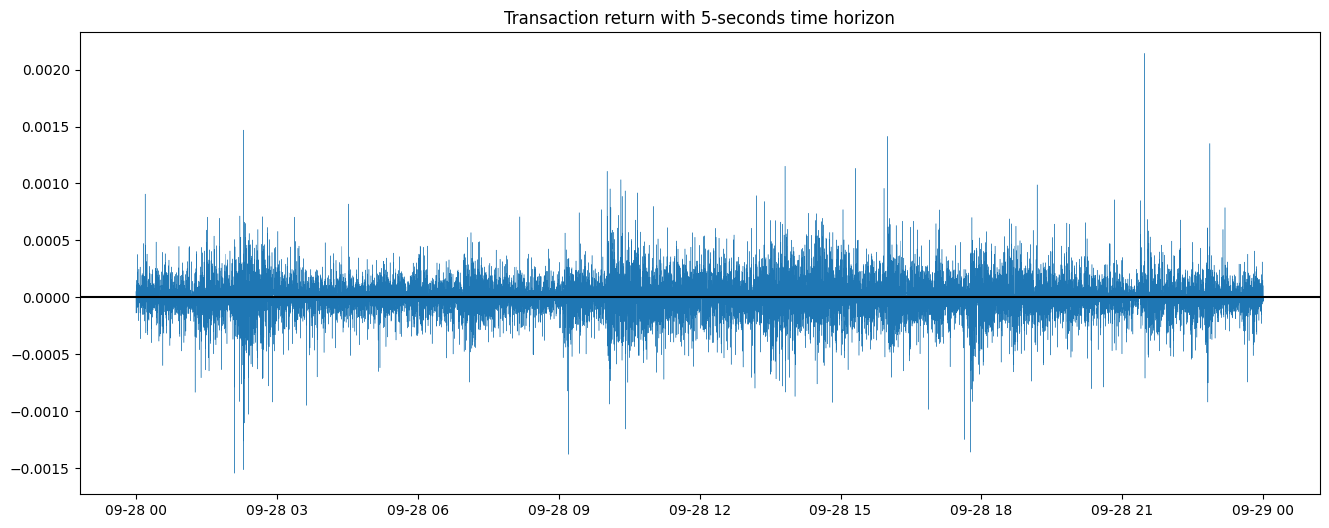

In [33]:
plt.figure(figsize=(16,6))
plt.plot(target['datetime'], target['ret'], linewidth=0.3)
plt.axhline(y=0, c='black')
plt.title('Transaction return with 5-seconds time horizon')

In [34]:
target = target.rename(columns={'datetime':'T'})

In [35]:
target.head(5)

,timestamp_sec,T,avgPx,midprice,ret
1,1664323205,2022-09-28 00:00:05,19086.692271,19085.655,0.000054
2,1664323210,2022-09-28 00:00:10,19086.020717,19087.070,-0.000055
3,1664323215,2022-09-28 00:00:15,19082.571387,19085.225,-0.000139
4,1664323220,2022-09-28 00:00:20,19082.299873,19081.430,0.000046
5,1664323225,2022-09-28 00:00:25,19079.246744,19080.800,-0.000081


In [36]:
target

,timestamp_sec,T,avgPx,midprice,ret
1,1664323205,2022-09-28 00:00:05,19086.692271,19085.655,0.000054
2,1664323210,2022-09-28 00:00:10,19086.020717,19087.070,-0.000055
3,1664323215,2022-09-28 00:00:15,19082.571387,19085.225,-0.000139
4,1664323220,2022-09-28 00:00:20,19082.299873,19081.430,0.000046
5,1664323225,2022-09-28 00:00:25,19079.246744,19080.800,-0.000081
...,...,...,...,...,...
17275,1664409575,2022-09-28 23:59:35,19412.918621,19413.565,-0.000033
17276,1664409580,2022-09-28 23:59:40,19414.755208,19412.760,0.000103
17277,1664409585,2022-09-28 23:59:45,19414.333396,19414.950,-0.000032
17278,1664409590,2022-09-28 23:59:50,19414.507910,19414.400,0.000006


# Insert datetime_ms column and define df2_4

In [37]:
df2_1['ms2'] = df2_1.timestamp.apply(lambda x: int(str(x)[:13]))
df2_1['datetime_ms'] = pd.to_datetime(df2_1['ms2'], unit = 'ms')
df2_4 = df2_1.filter(items=('ms2', 'datetime_ms', 'price', 'amount', 'direction'))

## Construct Transaction Imbalance

In [38]:
lag = "100ms"

In [39]:
df2_4 = df2_1.filter(items=('ms2', 'datetime_ms', 'price', 'amount', 'direction'))
df2_4['signed_volume'] = df2_4.amount * df2_4.direction
df2_4 = df2_4.set_index('datetime_ms')
# resampling
d3 = df2_4[['signed_volume', 'amount']].resample(lag).sum().reset_index()
d3['T'] = d3['datetime_ms'].shift(-1)
d3 = d3.rename(columns={'amount':'total_volume_from_lag_1', 'datetime_ms':'T-0.1'})
d3 = d3.dropna()

In [40]:
temp = pd.merge_asof(target, d3, on='T')
temp['txn_imbalance_lag_0.1'] = temp['signed_volume']/temp['total_volume_from_lag_1']
temp = temp.fillna(0)
transaction_imbalance = temp[['T', 'T-0.1', 'txn_imbalance_lag_0.1']]

Text(0.5, 1.0, 'Transcation Imbalance with lag 100ms')

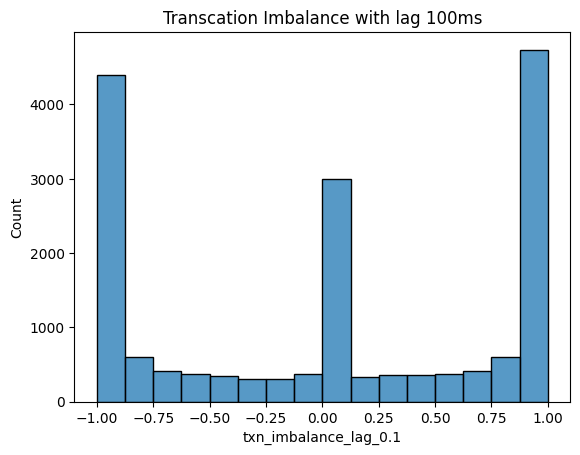

In [41]:
sns.histplot(transaction_imbalance['txn_imbalance_lag_0.1'])
plt.title("Transcation Imbalance with lag " + lag)

# Construct Past Return

In [42]:
lag = "500ms"

In [43]:
d4 = df2_4[['price']].resample(lag).mean().reset_index()
d4['T'] = d4['datetime_ms'].shift(-1)
d4 = d4.rename(columns={'price':'avgPx_lag_0.1', 'datetime_ms':'T-0.1'})
d4_1 = df2_4[['price']].resample(lag).last().reset_index()
d4_1 = d4_1.rename(columns={'price':'lastPx_lag_0.1', 'datetime_ms':'T-0.1'})
temp = d4.merge(d4_1, how='left', on='T-0.1')
temp = temp.dropna(subset=['T'])

In [44]:
# merge with target table
past_ret = pd.merge_asof(target, temp, on='T')
past_ret['past_ret'] = 1- past_ret['avgPx_lag_0.1']/past_ret['lastPx_lag_0.1']
past_ret = past_ret.fillna(0)

Text(0.5, 1.0, 'Histogram of past return with lag 500ms')

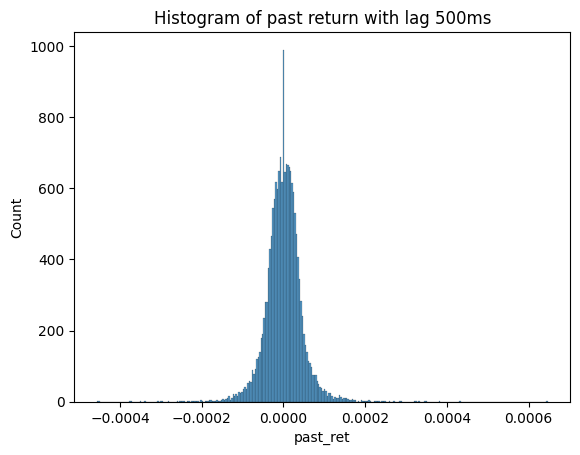

In [45]:
sns.histplot(past_ret.past_ret)
plt.title('Histogram of past return with lag ' + lag)

## Construct LOB Imbalance

In [46]:
df1_4 = df1[['timestamp', 'asks[0].price', 'asks[0].amount', 'bids[0].price', 'bids[0].amount']]
df1_4 = df1_4.rename(columns={'asks[0].price':'best_ask_price', 'asks[0].amount':'best_ask_size', 'bids[0].price':'best_bid_price', 'bids[0].amount':'best_bid_size'})
# construct feature: depth imbalance
df1_4['depth_imb'] = (df1_4['best_ask_size'] - df1_4['best_bid_size'])/(df1_4['best_ask_size'] + df1_4['best_bid_size'])

In [47]:
df1_4['ms'] = df1_4.timestamp.apply(lambda x: int(str(x)[:13]))
df1_4['datetime_ms'] = pd.to_datetime(df1_4['ms'], unit = 'ms')
# set index for resampling
df1_4 = df1_4.set_index('datetime_ms')

In [48]:
lag = "100ms"

In [49]:
# resampling and shift by one below
# use most recent price and size
# depth_imbalance = df1_4[['best_ask_price', 'best_ask_size', 'best_bid_price', 'best_bid_size', 'depth_imb']].resample(lag).last().shift(1)
depth_imbalance = df1_4[['depth_imb']].resample(lag).mean().shift(1)
depth_imbalance = depth_imbalance.fillna(method='ffill').dropna().reset_index()

Text(0.5, 1.0, 'Limit Order Book Imbalance with lag 100ms')

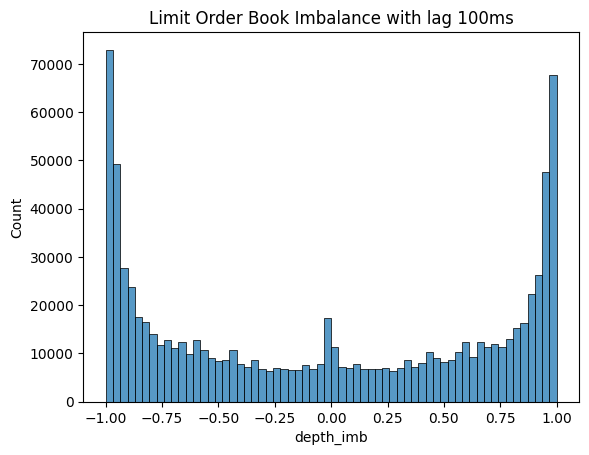

In [50]:
sns.histplot(depth_imbalance.depth_imb)
plt.title("Limit Order Book Imbalance with lag " + lag)

In [51]:
depth_imbalance = depth_imbalance.rename(columns={'datetime_ms':'T'})
depth_imbalance_1 = pd.merge_asof(target, depth_imbalance, on='T')

## Construct Lambda: transaction price change in the interval relative to total volume

In [52]:
lag = "500ms"

In [53]:
l1 = df2_4[['price']].resample(lag).last().reset_index()
l1['T'] = l1['datetime_ms'].shift(-1)
l1 = l1.rename(columns={'price':'lastPx'})
l2 = df2_4[['price']].resample(lag).first().reset_index()
l2 = l2.rename(columns={'price':'firstPx'})
l3 = df2_4[['amount']].resample(lag).sum().reset_index()
l3 = l3.rename(columns={'amount':'totVol'})

In [54]:
l4 = l1.merge(l2, how='left', on='datetime_ms')
l4 = l4.merge(l3, how='left', on='datetime_ms')

In [55]:
l4['Lambda'] = (l4['lastPx']-l4['firstPx'])/l4['totVol']
l4 = l4.dropna(subset=['T'])
l4 = l4.fillna(0)
l4 = l4.filter(items=('T', 'Lambda'))

In [56]:
px_change_rel_vol = pd.merge_asof(target, l4, on='T')
px_change_rel_vol

,timestamp_sec,T,avgPx,midprice,ret,Lambda
0,1664323205,2022-09-28 00:00:05,19086.692271,19085.655,0.000054,-0.091944
1,1664323210,2022-09-28 00:00:10,19086.020717,19087.070,-0.000055,-0.071168
2,1664323215,2022-09-28 00:00:15,19082.571387,19085.225,-0.000139,-0.752651
3,1664323220,2022-09-28 00:00:20,19082.299873,19081.430,0.000046,0.479204
4,1664323225,2022-09-28 00:00:25,19079.246744,19080.800,-0.000081,-0.117469
...,...,...,...,...,...,...
17274,1664409575,2022-09-28 23:59:35,19412.918621,19413.565,-0.000033,0.000000
17275,1664409580,2022-09-28 23:59:40,19414.755208,19412.760,0.000103,0.262502
17276,1664409585,2022-09-28 23:59:45,19414.333396,19414.950,-0.000032,-14.397906
17277,1664409590,2022-09-28 23:59:50,19414.507910,19414.400,0.000006,0.470358


In [57]:
px_change_rel_vol.describe()

,timestamp_sec,avgPx,midprice,ret,Lambda
count,1.727900e+04,17279.000000,17279.000000,17279.000000,17279.000000
mean,1.664366e+09,19122.641771,19122.596847,0.000002,0.181315
std,2.494081e+04,350.499054,350.474875,0.000178,18.692055
min,1.664323e+09,18491.123390,18489.490000,-0.001546,-658.653846
25%,1.664345e+09,18763.729365,18763.765000,-0.000084,-0.454507
50%,1.664366e+09,19084.970854,19084.890000,0.000002,0.000000
75%,1.664388e+09,19504.128631,19503.947500,0.000089,0.497677
max,1.664410e+09,19775.373665,19774.420000,0.002143,1000.000000


## Construct Quoted Spread

In [58]:
qs1 = df1[['timestamp', 'asks[0].price', 'asks[0].amount', 'bids[0].price', 'bids[0].amount']]
qs1 = qs1.rename(columns={'asks[0].price':'best_ask_price', 'asks[0].amount':'best_ask_size', 'bids[0].price':'best_bid_price', 'bids[0].amount':'best_bid_size'})

# construct feature: prop_spread
qs1['prop_spread'] = 2*(qs1['best_ask_price'] - qs1['best_bid_price'])/(qs1['best_ask_price'] + qs1['best_bid_price'])

In [59]:
qs1['ms'] = qs1.timestamp.apply(lambda x: int(str(x)[:13]))
qs1['datetime_ms'] = pd.to_datetime(qs1['ms'], unit = 'ms')
# set index for resampling
qs1 = qs1.set_index('datetime_ms')
qs1 = qs1[['prop_spread']]

In [60]:
lag = "100ms"

In [61]:
qs2 = qs1[['prop_spread']].resample(lag).mean().shift(1).reset_index()
qs2 = qs2.fillna(method='ffill').dropna()

Text(0.5, 1.0, 'Quoted Spread with lag 100ms')

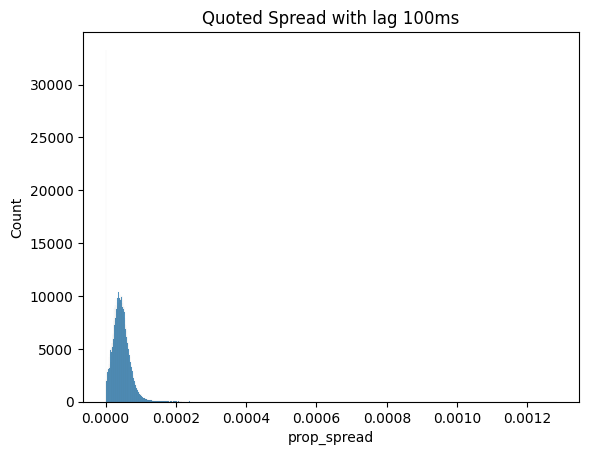

In [62]:
sns.histplot(qs2.prop_spread)
plt.title("Quoted Spread with lag " + lag)

In [63]:
qs2 = qs2.rename(columns={"datetime_ms":"T"})

In [64]:
quoted_spread = pd.merge_asof(target, qs2, on='T')

## Construct Breadth: number of transactions & Immediacy: average time between successive transactions

In [65]:
lag = "250ms"

In [66]:
b1 = df2_4[['direction']].resample(lag).count().shift(1).reset_index()
b1 = b1.rename(columns={'direction':'numTrade', 'datetime_ms':'T'})

breadth = pd.merge_asof(target, b1, on='T')

In [67]:
## change parameter here lag = 250
breadth['immediacy'] = 250/breadth['numTrade']

In [68]:
# replace with lag duration = 250
breadth.replace([np.inf, -np.inf], 250, inplace=True)

In [69]:
np.isinf(breadth).values.sum()

0

<AxesSubplot: xlabel='immediacy', ylabel='Count'>

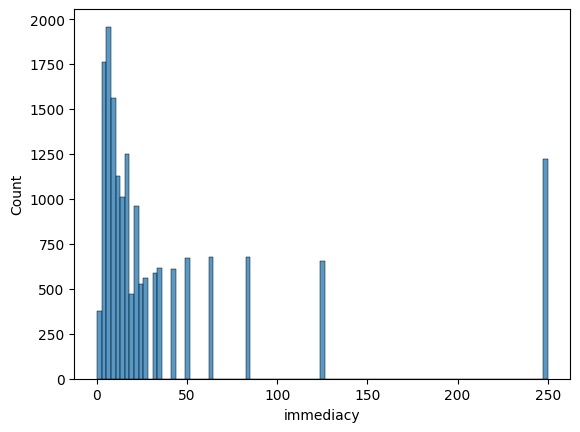

In [70]:
sns.histplot(breadth.immediacy)

Text(0.5, 1.0, 'Number of Transaction with lag 250ms')

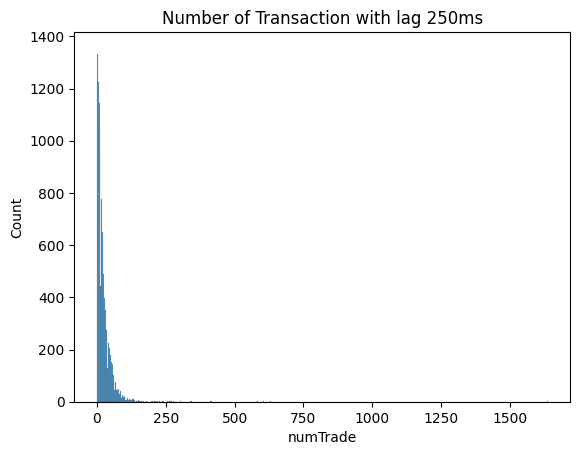

In [71]:
sns.histplot(breadth.numTrade)
plt.title("Number of Transaction with lag " + lag)

## Construct Total Volume

In [72]:
lag = "250ms"

In [73]:
v1 = df2_4[['amount']].resample(lag).sum().shift(1).reset_index()
v1 = v1.rename(columns={'amount':'totVol', 'datetime_ms':'T'})
totVol = pd.merge_asof(target, v1, on='T')

## Construct Maximum Volume

In [74]:
lag = "250ms"

v2 = df2_4[['amount']].resample(lag).max().shift(1).reset_index()
v2 = v2.rename(columns={'amount':'maxVol', 'datetime_ms':'T'})
maxVol = pd.merge_asof(target, v2, on='T')
maxVol = maxVol.fillna(0)

<AxesSubplot: xlabel='maxVol', ylabel='Count'>

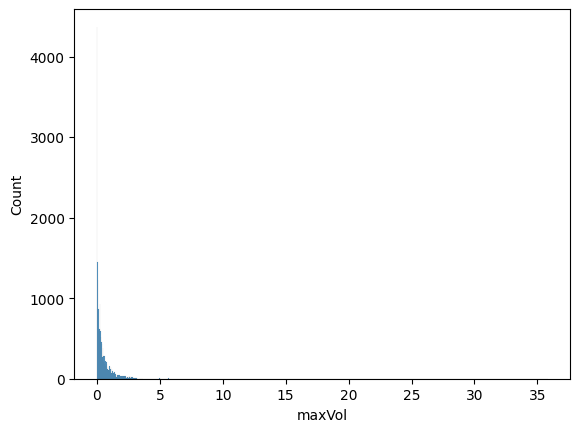

In [75]:
sns.histplot(maxVol.maxVol)

## Put all features together

In [76]:
target_1 = target[['T', 'ret']]

In [77]:
target_1 = target_1.merge(transaction_imbalance[['T','txn_imbalance_lag_0.1']], how='left', on='T')

In [78]:
target_1 = target_1.merge(past_ret[['T','past_ret']], how='left', on='T')

In [79]:
target_1 = target_1.merge(depth_imbalance_1[['T','depth_imb']], how='left', on='T')

In [80]:
target_1 = target_1.merge(px_change_rel_vol[['T','Lambda']], how='left', on='T')

In [81]:
target_1 = target_1.merge(quoted_spread[['T','prop_spread']], how='left', on='T')

In [82]:
target_1 = target_1.merge(breadth[['T','numTrade', 'immediacy']], how='left', on='T')

In [83]:
target_1 = target_1.merge(totVol[['T','totVol']], how='left', on='T')

In [84]:
target_1['avgVol'] = target_1['totVol']/target_1['numTrade']
target_1 = target_1.fillna(0)

In [85]:
target_1 = target_1.merge(maxVol[['T','maxVol']], how='left', on='T')

In [86]:
# data for modelling -> target_1
target_1

,T,ret,txn_imbalance_lag_0.1,past_ret,depth_imb,Lambda,prop_spread,numTrade,immediacy,totVol,avgVol,maxVol
0,2022-09-28 00:00:05,0.000054,1.0,0.000007,0.765533,-0.091944,6.916423e-05,3.0,83.333333,0.11077,0.036923,0.10000
1,2022-09-28 00:00:10,-0.000055,0.0,0.000003,-0.465616,-0.071168,5.501076e-05,3.0,83.333333,0.01822,0.006073,0.01092
2,2022-09-28 00:00:15,-0.000139,0.0,-0.000004,-0.996601,-0.752651,6.235196e-05,4.0,62.500000,0.03487,0.008717,0.02211
3,2022-09-28 00:00:20,0.000046,1.0,0.000028,-0.637949,0.479204,1.834296e-05,15.0,16.666667,1.62657,0.108438,1.27915
4,2022-09-28 00:00:25,-0.000081,1.0,0.000024,-0.972961,-0.117469,3.878271e-05,3.0,83.333333,0.15817,0.052723,0.12731
...,...,...,...,...,...,...,...,...,...,...,...,...
17274,2022-09-28 23:59:35,-0.000033,-1.0,0.000000,0.665666,0.000000,5.151037e-07,1.0,250.000000,0.06089,0.060890,0.06089
17275,2022-09-28 23:59:40,0.000103,1.0,0.000006,-0.976656,0.262502,2.318097e-05,11.0,22.727273,2.86641,0.260583,1.39356
17276,2022-09-28 23:59:45,-0.000032,1.0,-0.000010,0.986291,-14.397906,1.596708e-05,2.0,125.000000,0.02000,0.010000,0.01900
17277,2022-09-28 23:59:50,0.000006,1.0,0.000029,-0.913692,0.470358,6.284050e-05,10.0,25.000000,3.30662,0.330662,1.77691


In [87]:
# check infinity
np.isinf(target_1).values.sum()

0

## Modelling

In [88]:
df = target_1.drop("T", axis=1)

In [89]:
df_train = df.iloc[:11520]
df_test = df.iloc[11520:]

In [90]:
X_1 = df_train.drop("ret", axis=1)
y_1 = df_train.ret

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, train_size=0.8, test_size=0.2, random_state=0, shuffle=False)

X_test = df_test.drop("ret", axis=1)
y_test = df_test.ret

## Standardise Columns

In [92]:
X_train_1 = (X_train - X_train.mean())/X_train.std()
X_valid_1 = (X_valid - X_train.mean())/X_train.std()
X_test_1 = (X_test - X_train.mean())/X_train.std()

## Winsorisation

In [93]:
def clip_series(s, lower, upper):
   clipped = s.clip(lower=s.quantile(lower), upper=s.quantile(upper))
   return clipped

# Manage list of features to be winsorized
feature_list = list(X_train_1.columns)

for f in feature_list:
   X_train_1[f] = clip_series(X_train_1[f], 0.05, 0.95)

## OLS

In [94]:
import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train_1, prepend=False)

mod = sm.OLS(y_train, X_train_ols)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.557
Date:                Wed, 26 Oct 2022   Prob (F-statistic):              0.113
Time:                        17:02:04   Log-Likelihood:                 66910.
No. Observations:                9216   AIC:                        -1.338e+05
Df Residuals:                    9205   BIC:                        -1.337e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
txn_imbalance_lag_0.1 -2.261e-

## Lasso

In [95]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train_1, y_train).predict(X_valid_1)
r2_score_lasso = r2_score(y_valid, y_pred_lasso)
print(lasso)
print("r^2 on validation data : %f" % r2_score_lasso)

Lasso(alpha=0.1)
r^2 on validation data : -0.001660


In [96]:
lasso.coef_

array([-0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0.])

## Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0)
regr.fit(X_train_1, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [98]:
y_valid_pred = regr.predict(X_valid_1)
r2_score_rf = r2_score(y_valid, y_valid_pred)
print("r^2 on validation data : %f" % r2_score_rf)

r^2 on validation data : -0.001217
